    age  sex  steroid  antivirals  fatigue  malaise  anorexia  liver_big  \
0  36.0    1        1           2        1        1         1          1   
1  45.0    1        1           1        1        1         1          1   
2  47.0    1        0           1        1        1         1          1   
3  36.0    1        0           2        1        1         1          1   
4  50.0    1        1           2        1        1         1          1   

   liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  \
0           1                1        1        1        1          3   
1           1                1        1        1        1         10   
2           1                1        1        1        1         34   
3           1                0        1        1        1          5   
4           1                1        1        1        1          7   

   alk_phosphate  sgot  albumin  protime  histology  target  
0             10    44       16       44        

Text(0.5, 1.0, 'Age Distribution')

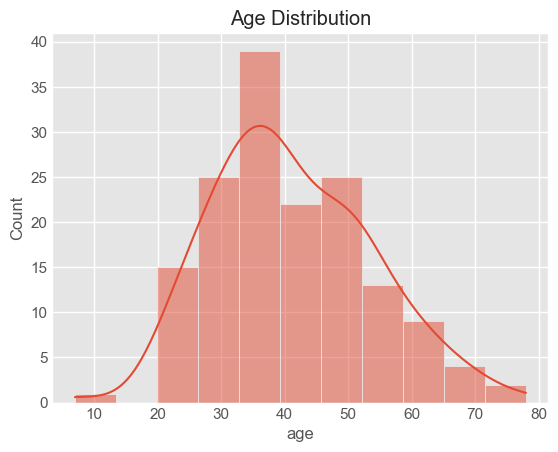

In [87]:
# Import tsv file
import pandas as pd
import os

# Read the TSV file
df = pd.read_csv('hepatitis.tsv', sep='\t')

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

print(df.head())

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

In [88]:
# Find outliers
def find_outliers(df):
    # Calculate the Z-score for each column
    z_scores = (df - df.mean()) / df.std()
    # Identify outliers (Z-score > 3 or < -3)
    outliers = (z_scores > 3) | (z_scores < -3)
    return outliers
    
# Find outliers in the dataset
outliers = find_outliers(df)
# Print outliers
print("Outliers in the dataset:")
for col in outliers.columns:
    if outliers[col].any():
        print(f"Column '{col}':")
        print(df[outliers[col]])
        print()

# Drop outliers
print(df.shape)
df = df[~outliers.any(axis=1)]
print(df.shape)

# Find IQR outliers in "age"
IQR = df['age'].quantile(0.75) - df['age'].quantile(0.25)
lower_bound = df['age'].quantile(0.25) - 1.5 * IQR
upper_bound = df['age'].quantile(0.75) + 1.5 * IQR
outliers_iqr = (df['age'] < lower_bound) | (df['age'] > upper_bound)
# Print IQR outliers
print("IQR outliers in 'age':")
print(df[outliers_iqr])

Outliers in the dataset:
Column 'fatigue':
      age  sex  steroid  antivirals  fatigue  malaise  anorexia  liver_big  \
121  34.0    1        0           2        2        2         2          2   

     liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  \
121           2                2        2        2        2         34   

     alk_phosphate  sgot  albumin  protime  histology  target  
121             83    84       29       44          1       2  

(155, 20)
(154, 20)
IQR outliers in 'age':
      age  sex  steroid  antivirals  fatigue  malaise  anorexia  liver_big  \
101  78.0    1        1           2        0        1         1          1   

     liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  \
101           1                1        1        1        1          4   

     alk_phosphate  sgot  albumin  protime  histology  target  
101             82    46       16       44          1       2  


In [89]:
# See if there are any missing values
# print(df.isnull().sum())

# See if there are any duplicates
# print(df.duplicated().sum())

# Print summary statistics
# print(df.describe())

# Print min and max of each column
print(df.min())
print(df.max())

# Convert age into a categorical variable by dividing into 3 groups (bins)
x = 1/3
def age_category(age):
  R1 = df['age'].quantile(x)
  R2 = df['age'].quantile(2*x)
  print(R1, R2)
  if age <= R1:
    return 0
  elif age <= R2:
    return 1
  else:
    return 2
    
print(df.columns)
    
# df['age'] = df['age'].apply(age_category)

age                7.0
sex                1.0
steroid            0.0
antivirals         1.0
fatigue            0.0
malaise            0.0
anorexia           0.0
liver_big          0.0
liver_firm         0.0
spleen_palpable    0.0
spiders            0.0
ascites            0.0
varices            0.0
bilirubin          0.0
alk_phosphate      0.0
sgot               0.0
albumin            0.0
protime            0.0
histology          1.0
target             1.0
dtype: float64
age                78.0
sex                 2.0
steroid             2.0
antivirals          2.0
fatigue             1.0
malaise             1.0
anorexia            1.0
liver_big           2.0
liver_firm          2.0
spleen_palpable     2.0
spiders             2.0
ascites             2.0
varices             2.0
bilirubin          34.0
alk_phosphate      83.0
sgot               84.0
albumin            29.0
protime            44.0
histology           2.0
target              2.0
dtype: float64
Index(['age', 'sex', 'steroid'

In [90]:
# Normalize the data column-wise
def normalize(df):
    df = (df - df.min()) / (df.max() - df.min())
    return df

# Normalize the data
df = normalize(df)

# Print the first 5 rows of the normalized data
print(df.head())

        age  sex  steroid  antivirals  fatigue  malaise  anorexia  liver_big  \
0  0.408451  0.0      0.5         1.0      1.0      1.0       1.0        0.5   
1  0.535211  0.0      0.5         0.0      1.0      1.0       1.0        0.5   
2  0.563380  0.0      0.0         0.0      1.0      1.0       1.0        0.5   
3  0.408451  0.0      0.0         1.0      1.0      1.0       1.0        0.5   
4  0.605634  0.0      0.5         1.0      1.0      1.0       1.0        0.5   

   liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  \
0         0.5              0.5      0.5      0.5      0.5   0.088235   
1         0.5              0.5      0.5      0.5      0.5   0.294118   
2         0.5              0.5      0.5      0.5      0.5   1.000000   
3         0.5              0.0      0.5      0.5      0.5   0.147059   
4         0.5              0.5      0.5      0.5      0.5   0.205882   

   alk_phosphate      sgot   albumin   protime  histology  target  
0       0.120482  

1. Basic Dataset Information
------------------------------
Shape: (154, 20)

First 5 rows:
        age  sex  steroid  antivirals  fatigue  malaise  anorexia  liver_big  \
0  0.408451  0.0      0.5         1.0      1.0      1.0       1.0        0.5   
1  0.535211  0.0      0.5         0.0      1.0      1.0       1.0        0.5   
2  0.563380  0.0      0.0         0.0      1.0      1.0       1.0        0.5   
3  0.408451  0.0      0.0         1.0      1.0      1.0       1.0        0.5   
4  0.605634  0.0      0.5         1.0      1.0      1.0       1.0        0.5   

   liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  \
0         0.5              0.5      0.5      0.5      0.5   0.088235   
1         0.5              0.5      0.5      0.5      0.5   0.294118   
2         0.5              0.5      0.5      0.5      0.5   1.000000   
3         0.5              0.0      0.5      0.5      0.5   0.147059   
4         0.5              0.5      0.5      0.5      0.5   0.20588

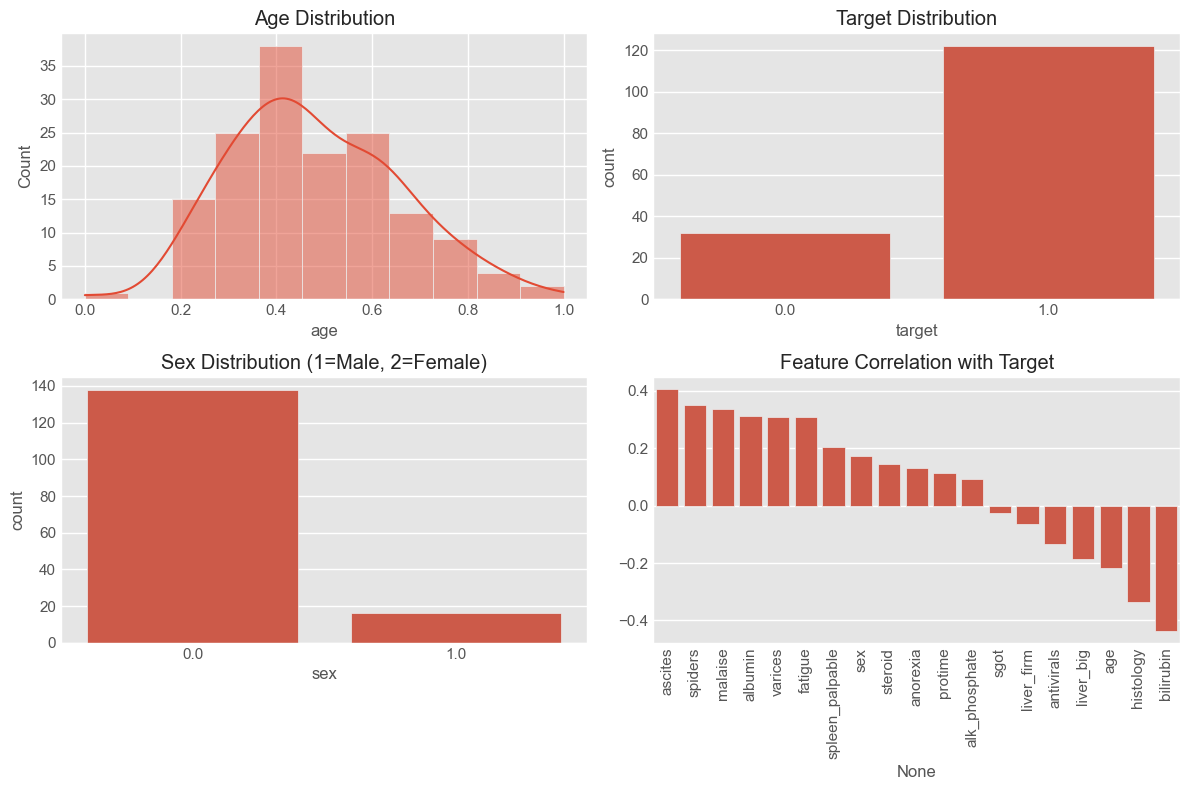

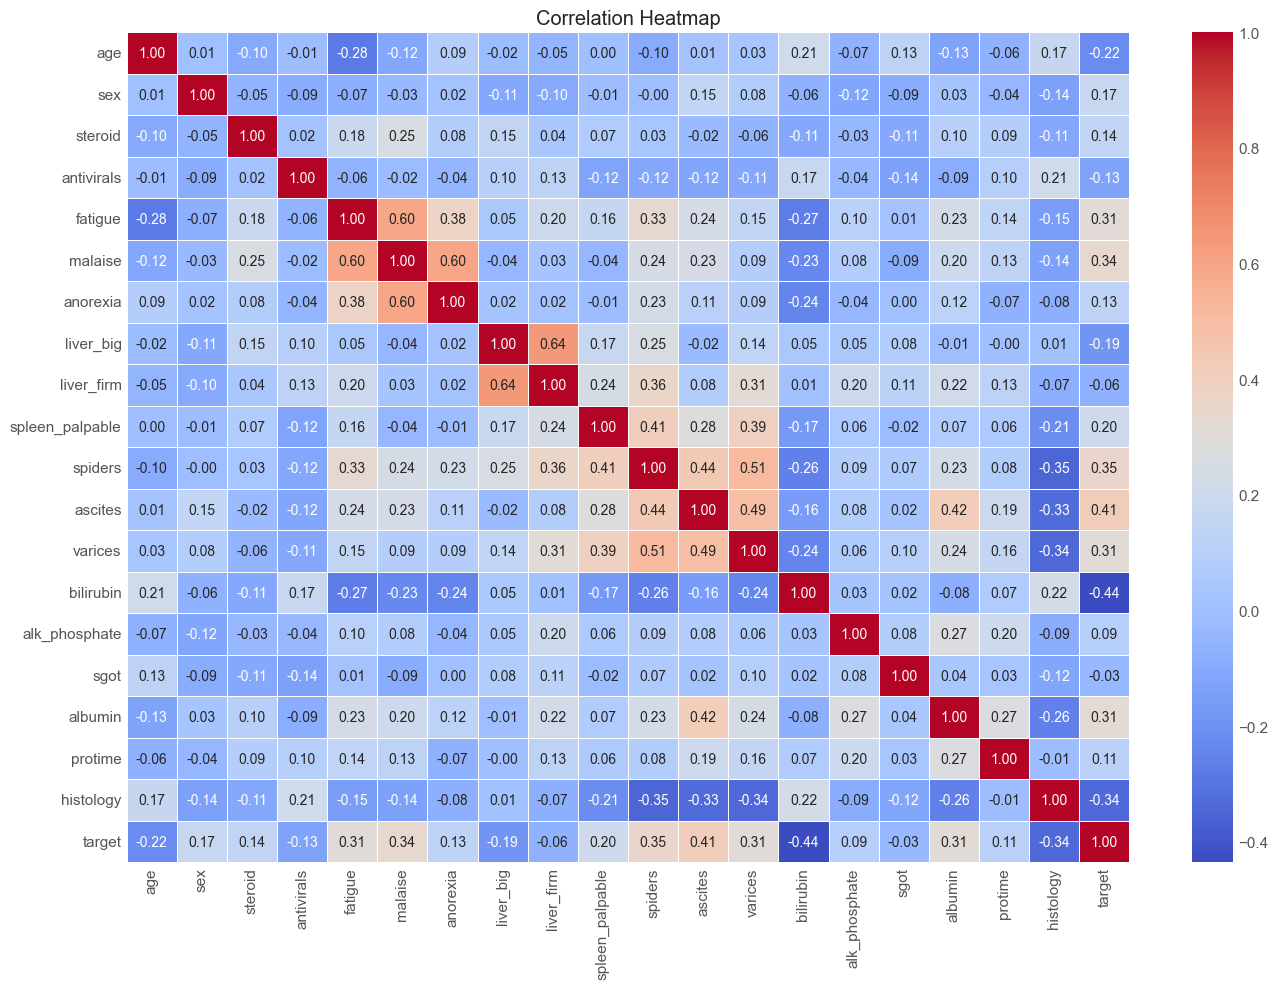

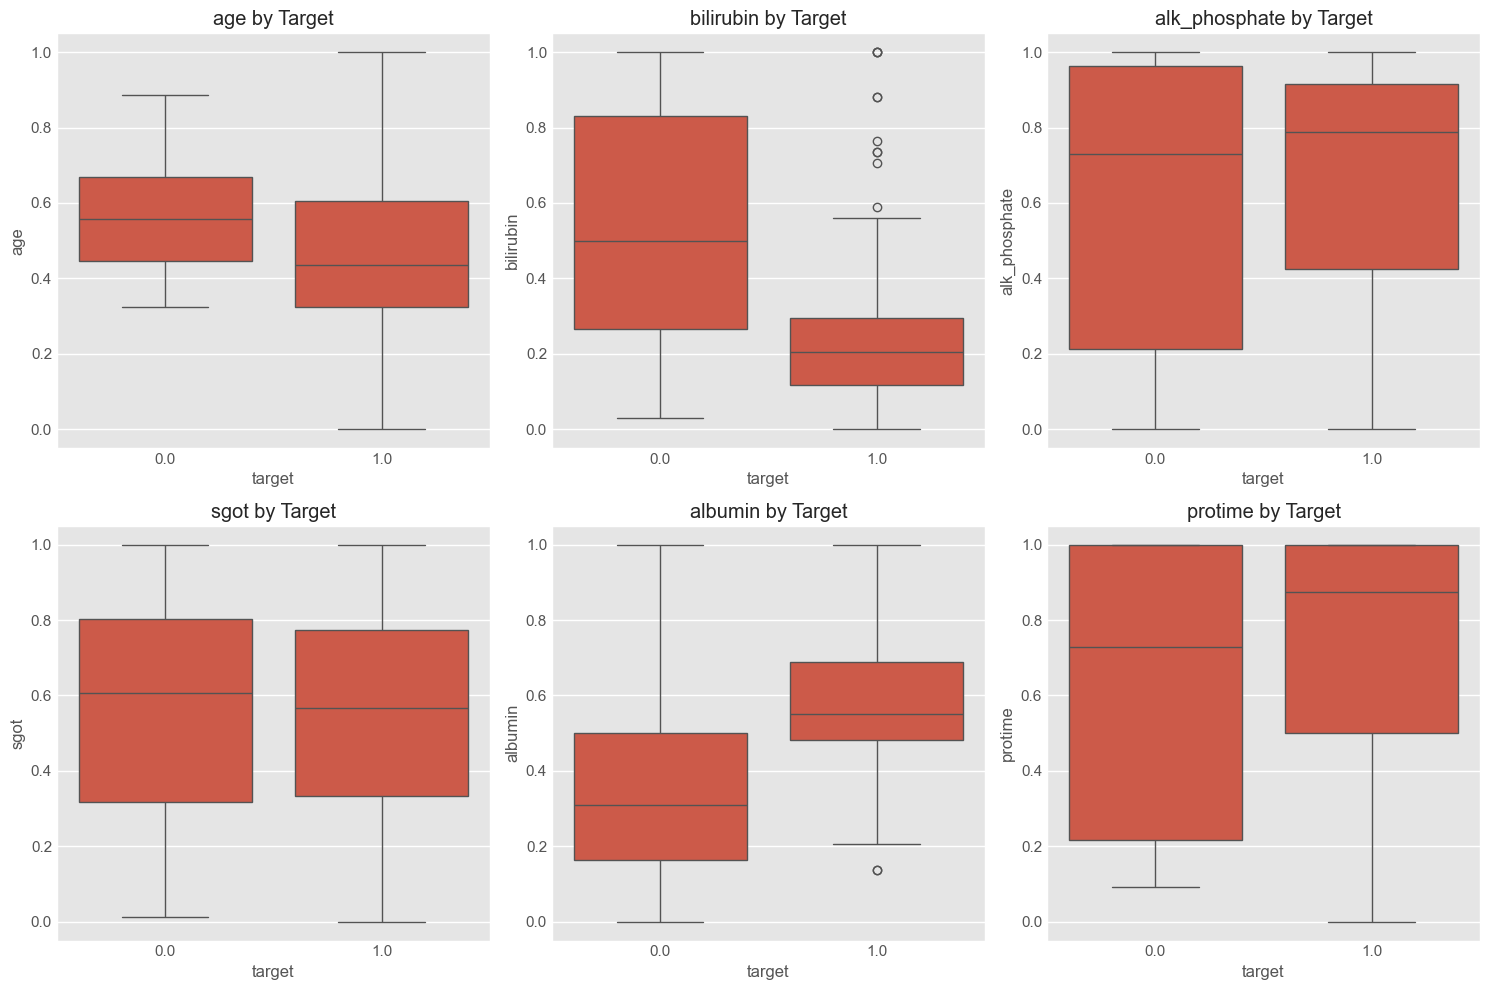

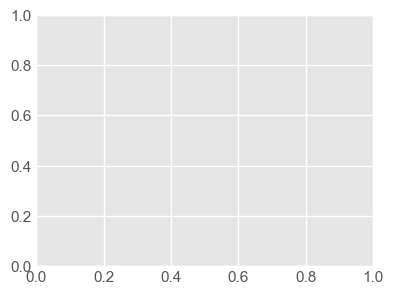

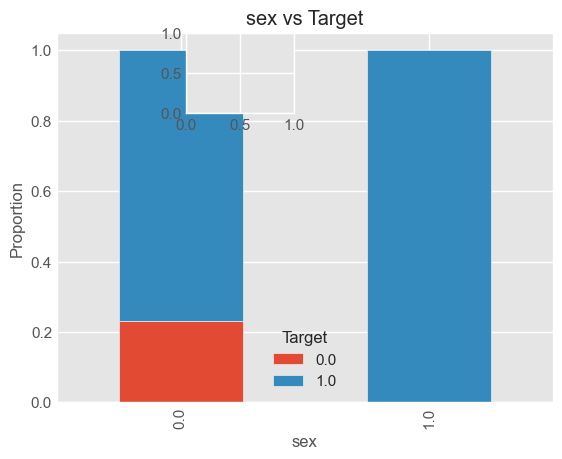

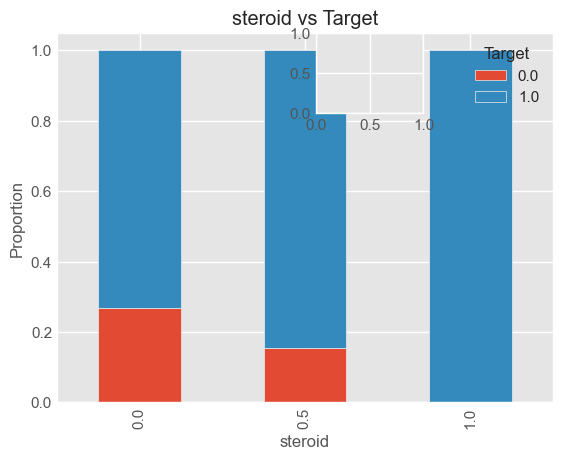

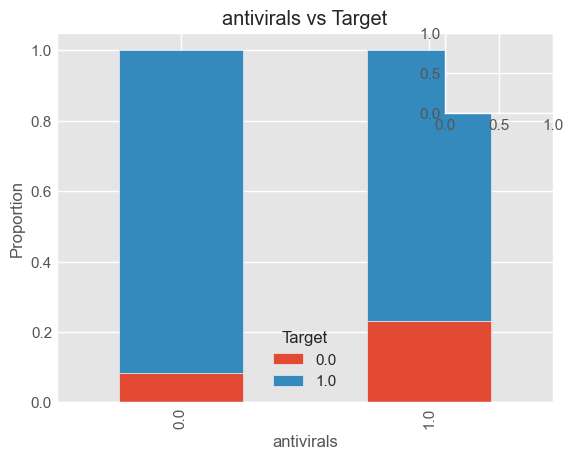

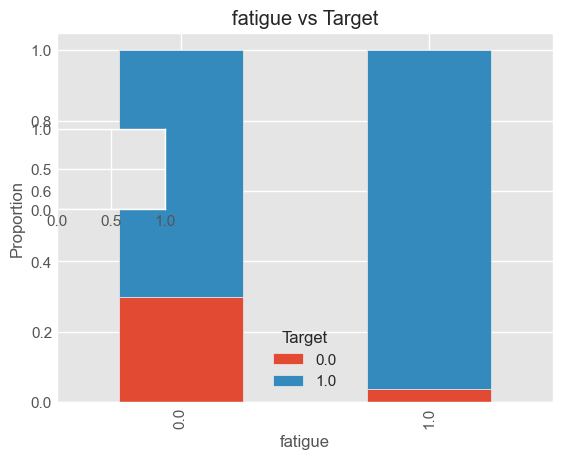

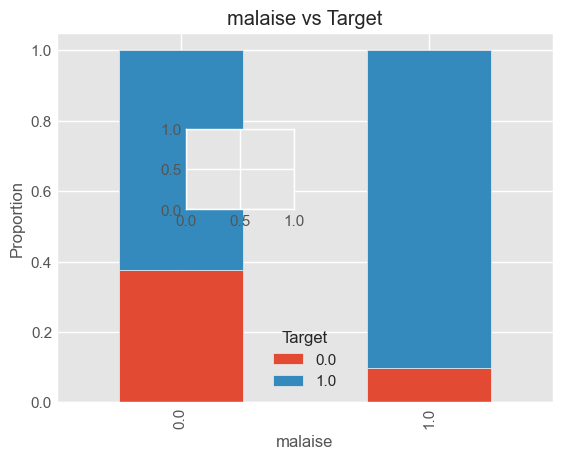

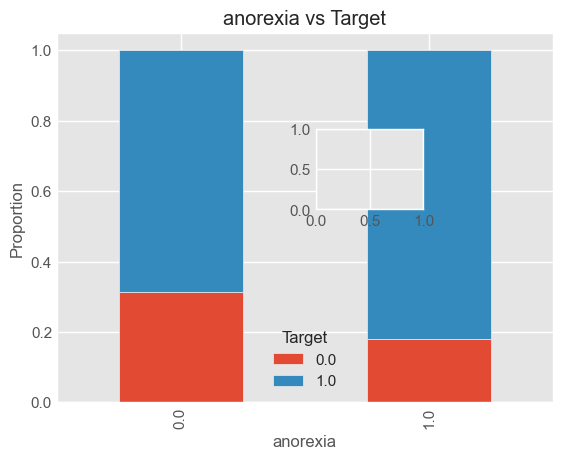

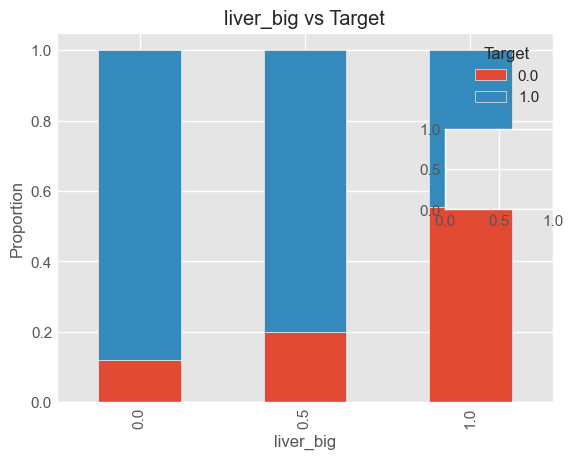

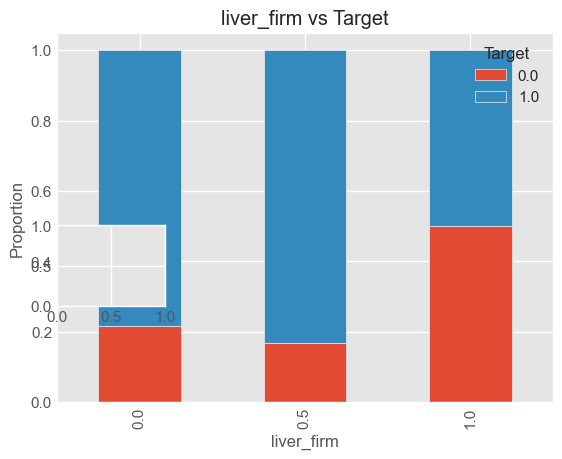

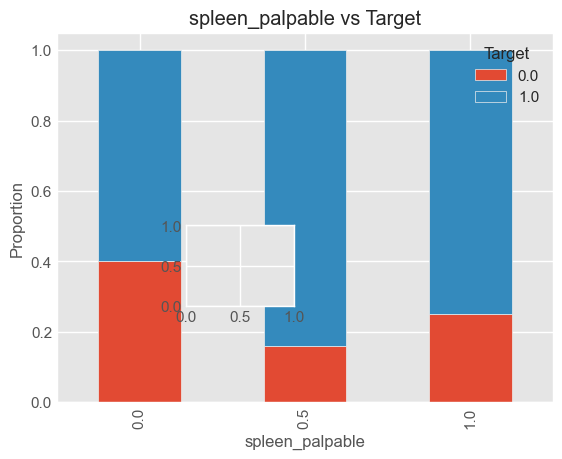

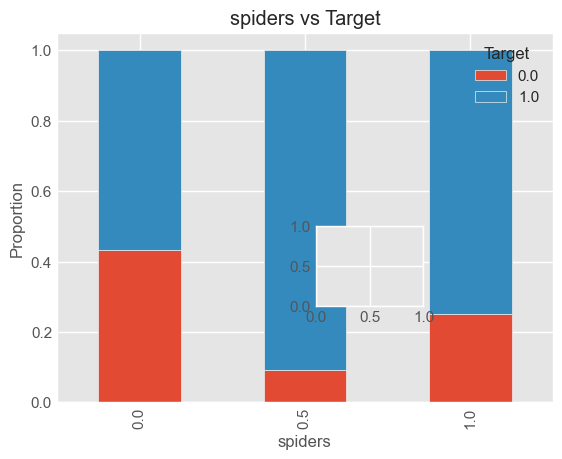

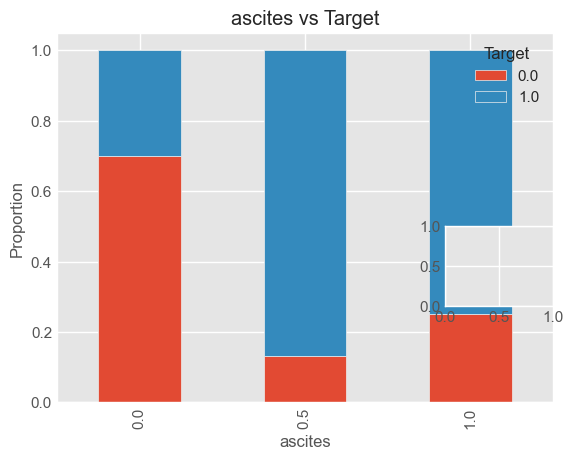

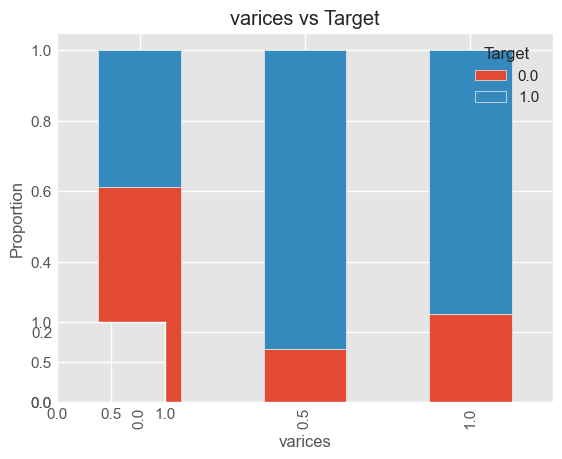

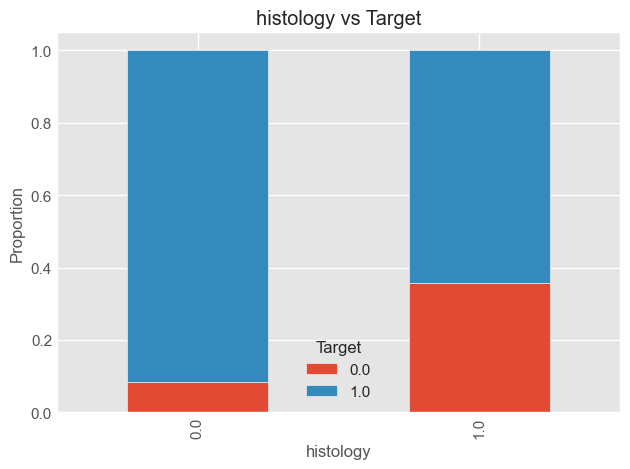

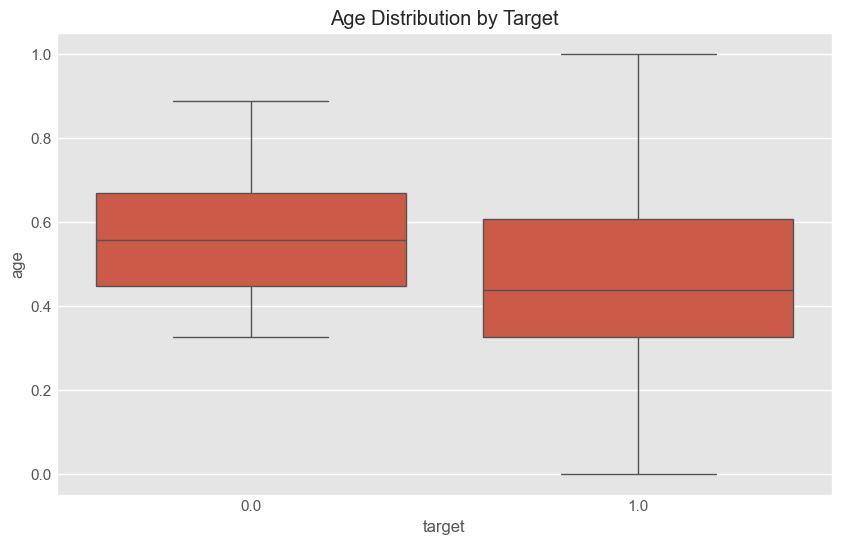

<Figure size 1200x1000 with 0 Axes>

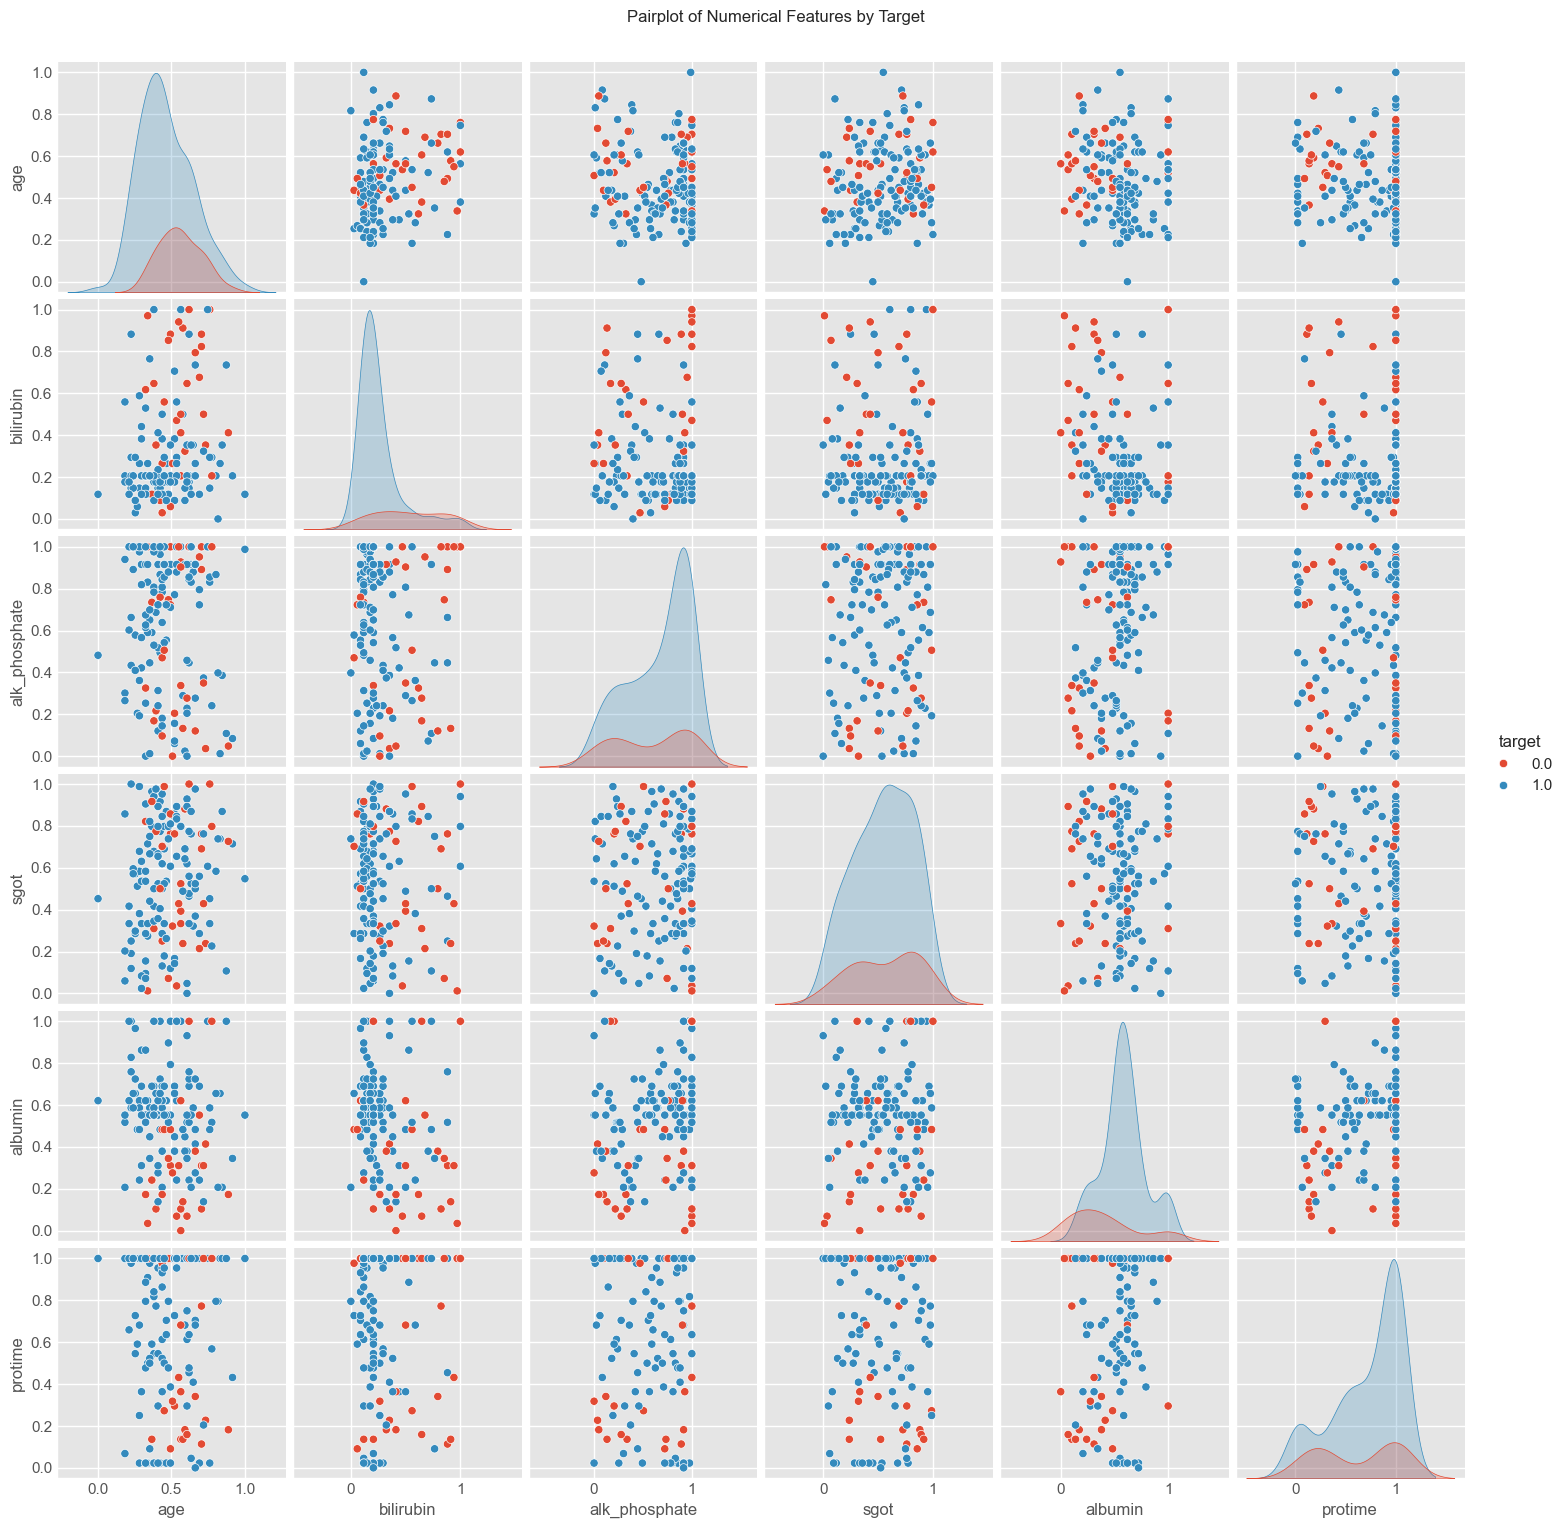

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import io

print("1. Basic Dataset Information")
print("-" * 30)
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\n2. Column Names and Data Types")
print("-" * 30)
print(df.dtypes)

print("\n3. Summary Statistics")
print("-" * 30)
print(df.describe())

print("\n4. Missing Values")
print("-" * 30)
print(df.isnull().sum())

# Checking for unique values in each column
print("\n5. Unique Values per Column")
print("-" * 30)
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

# Understanding categorical variables
print("\n6. Categorical Variables Distribution")
print("-" * 30)
categorical_cols = ['SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 
                    'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES', 
                    'VARICES', 'HISTOLOGY', 'target']
# to lower case
categorical_cols = [col.lower() for col in categorical_cols]

for col in categorical_cols:
    print(f"\n{col} Value Counts:")
    print(df[col].value_counts())

# Set up plotting
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

# Target variable distribution
plt.subplot(2, 2, 2)
sns.countplot(x='target', data=df)
plt.title('Target Distribution')

# Sex distribution
plt.subplot(2, 2, 3)
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution (1=Male, 2=Female)')

# Feature correlation with target
plt.subplot(2, 2, 4)
corr_with_target = df.corr()['target'].sort_values(ascending=False)
# remove target from the correlation
corr_with_target = corr_with_target.drop('target')
sns.barplot(x=corr_with_target.index, y=corr_with_target.values)
plt.title('Feature Correlation with Target')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('basic_plots.png')

# Create correlation heatmap
plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')

# Analyze numerical features by target
numerical_cols = ['AGE', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']
# Convert to lower case
numerical_cols = [col.lower() for col in numerical_cols]
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} by Target')

plt.tight_layout()
plt.savefig('numerical_by_target.png')

# Categorical features by target
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols[:-1]):  # Exclude target from this plot
    plt.subplot(4, 4, i+1)
    crosstab = pd.crosstab(df[col], df['target'], normalize='index')
    crosstab.plot(kind='bar', stacked=True)
    plt.title(f'{col} vs Target')
    plt.ylabel('Proportion')
    plt.legend(title='Target')

plt.tight_layout()
plt.savefig('categorical_by_target.png')

# Checking for age patterns
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title('Age Distribution by Target')
plt.savefig('age_by_target.png')

# Pairplot for key numerical variables
plt.figure(figsize=(12, 10))
sns.pairplot(df[numerical_cols + ['target']], hue='target')
plt.suptitle('Pairplot of Numerical Features by Target', y=1.02)
plt.savefig('pairplot.png')

print("\n7. Key Observations")
print("-" * 30)

# Target distribution
target_counts = df['target'].value_counts()
print(f"Target distribution: {target_counts.to_dict()}")

# Age statistics by target
age_by_target = df.groupby('target')['age'].agg(['mean', 'median', 'min', 'max'])
print("\nAge statistics by target:")
print(age_by_target)

# Key lab values by target
lab_cols = ['BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']
# Convert to lower case
lab_cols = [col.lower() for col in lab_cols]
lab_by_target = df.groupby('target')[lab_cols].agg(['mean', 'median'])
print("\nLab values by target:")
print(lab_by_target)

# Feature importance based on correlation with target
important_features = corr_with_target.abs().sort_values(ascending=False)
print("\nFeatures sorted by correlation strength with target:")
print(important_features)

In [93]:
# save the cleaned dataset as CSV
df.to_csv('hepatitis_cleaned.csv', index=False)

# save the cleaned dataset as TSV
df.to_csv('hepatitis_cleaned.tsv', sep='\t', index=False)